In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print('Training data first row & shape')
print(train_data[10])
print(train_data.shape)
print('\nTraining data labels & shape')
print(train_labels)
print(train_labels.shape)
print(len(np.unique(train_labels)))

print('\nTesting data first row & shape')
print(test_data[0])
print(test_data.shape)
print('\nTesting data labels & shape')
print(test_labels)
print(test_labels.shape)
print(len(np.unique(test_labels)))

Training data first row & shape
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
(8982,)

Training data labels & shape
[ 3  4  3 ... 25  3 25]
(8982,)
46

Testing data first row & shape
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]
(2246,)

Testing data labels & shape
[ 3 10  1 ...  3  3 24]
(2246,)
46


In [4]:
word_index = reuters.get_word_index()
reverse_index_dict = dict([(value, key) for (key, value) in word_index.items()])
decode_row = ' '.join([reverse_index_dict.get(i-3, '?') for i in train_data[10]])
print(decode_row)

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3


In [5]:
def vectorize_sequences(sequences, dimensions=10000):
  results = np.zeros((len(sequences), dimensions))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

print('Training data vectorized first row & shape')
print(x_train[10])
print(x_train.shape)

print('\nTesting data vectorized first row & shape')
print(x_test[0])
print(x_test.shape)


Training data vectorized first row & shape
[0. 1. 0. ... 0. 0. 0.]
(8982, 10000)

Testing data vectorized first row & shape
[0. 1. 1. ... 0. 0. 0.]
(2246, 10000)


In [6]:
def one_hot_labels(labels, dimensions=46):
  results = np.zeros((len(labels), dimensions))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

y_train = one_hot_labels(train_labels)
y_test  = one_hot_labels(test_labels)

print('Training labels one hot encoded, first row & shape')
print(y_train[0])
print(y_train.shape)

print('Testing labels one hot encoded, first row & shape')
print(y_test[2])
print(y_test.shape)

Training labels one hot encoded, first row & shape
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(8982, 46)
Testing labels one hot encoded, first row & shape
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(2246, 46)


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
x_val           = x_train[:1000]
partial_x_train = x_train[1000:]
y_val           = y_train[:1000]
partial_y_train = y_train[1000:]

print('Partial X train')
print(partial_x_train.shape)
print('\nx validation')
print(x_val.shape)

print('\nPartial y train')
print(partial_y_train.shape)
print('\ny validation')
print(y_val.shape)

Partial X train
(7982, 10000)

x validation
(1000, 10000)

Partial y train
(7982, 46)

y validation
(1000, 46)


In [11]:
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.3348 - loss: 3.2514 - val_accuracy: 0.5970 - val_loss: 1.8950
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.6424 - loss: 1.6982 - val_accuracy: 0.6870 - val_loss: 1.3833
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7353 - loss: 1.2262 - val_accuracy: 0.7350 - val_loss: 1.1854
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7875 - loss: 0.9913 - val_accuracy: 0.7680 - val_loss: 1.0692
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8355 - loss: 0.7846 - val_accuracy: 0.7940 - val_loss: 0.9882
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8545 - loss: 0.6831 - val_accuracy: 0.7970 - val_loss: 0.9641
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8796 - loss: 0.5621 - val_accuracy: 0.8100 - val_loss: 0.9143
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9011 - loss: 0.4696 - val_accuracy: 0.8050 -

In [12]:
history_dict = history.history

print(history_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


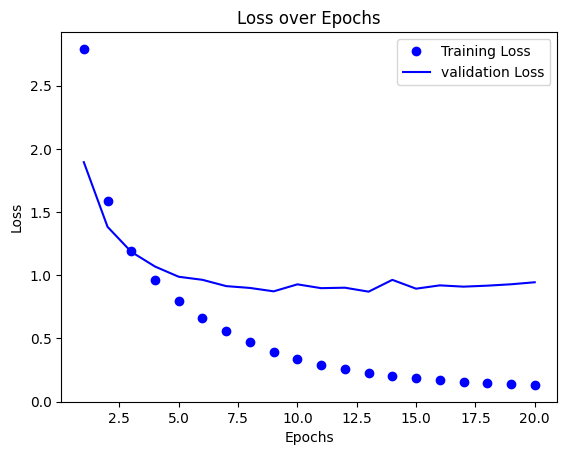

In [13]:
import matplotlib.pyplot as plt

loss_list     = [loss for loss in history_dict['loss']]
val_loss_list = [loss for loss in history_dict['val_loss']]
epochs        = range(1, len(loss_list)+1)

plt.plot(epochs, loss_list, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_list, 'b', label='validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

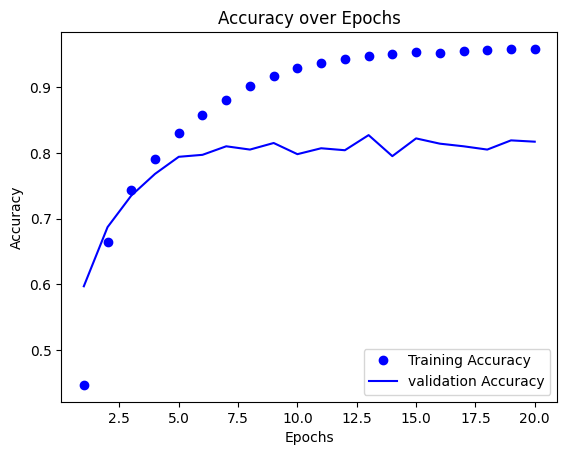

In [14]:
accuracy_list     = [accuracy for accuracy in history_dict['accuracy']]
val_accuracy_list = [accuracy for accuracy in history_dict['val_accuracy']]
epochs            = range(1, len(accuracy_list)+1)

plt.plot(epochs, accuracy_list, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy_list, 'b', label='validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
reguralized_model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

reguralized_model.compile(optimizer='rmsprop',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

reguralized_model.fit(x_train, y_train, epochs=9, batch_size=512)

reguralized_model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.3650 - loss: 3.1476
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.6396 - loss: 1.6142
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7184 - loss: 1.2548
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7711 - loss: 1.0112
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8147 - loss: 0.8509
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8422 - loss: 0.6891
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8677 - loss: 0.5683
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8935 - loss: 0.4638
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9086 - loss: 0.4038
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7884 - loss: 0.9412


[0.972260057926178, 0.7836152911186218]

In [20]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_dict = np.array(test_labels_copy) == np.array(test_labels)
print(hits_dict.mean())

0.18388245770258238


In [27]:
predictions = reguralized_model.predict(x_test)

print('Predictions first row & shape')
print(predictions[0])
print(predictions.shape)

print('Prediction is based on the class with the highest prediction output, all predictions add up to 1')
print(np.argmax(predictions[0]))
print('Row 1 sum')
print(np.sum(predictions[0]))


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predictions first row & shape
[2.2332577e-05 2.8258187e-04 1.5575552e-05 9.6893281e-01 2.3887977e-02
 7.2810772e-06 4.0265437e-05 1.2874972e-05 3.0668502e-04 8.6157988e-06
 3.2617183e-05 6.8090030e-04 1.9562593e-05 9.4863812e-05 1.0147348e-04
 2.7993419e-06 1.8496788e-03 4.9407034e-05 1.0488377e-04 2.9129686e-04
 1.2066955e-03 4.8690621e-04 1.2744685e-05 2.6268885e-04 1.8976129e-05
 5.5658584e-05 5.6548771e-07 1.5363908e-05 2.1383181e-05 1.1716307e-04
 8.7838289e-06 6.1727292e-04 3.2942455e-05 6.7980468e-06 9.5676252e-05
 9.9828603e-06 5.3522410e-05 1.7572758e-05 1.7482795e-05 9.8062723e-05
 3.1851763e-05 1.5322410e-05 4.1090998e-06 2.3826538e-05 2.0892761e-05
 3.3096103e-06]
(2246, 46)
Prediction is based on the class with the highest prediction output, all predictions add up to 1
3
Row 1 sum
1.0000001


In [30]:
y_train_int= np.array(train_labels)

print('Casting labels as intergers')
print(y_train_int[0])

print('\n One hot encoded labels')
print(y_train[0])

Casting labels as intergers
3

 One hot encoded labels
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
